In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [6]:
features = ['BedroomAbvGr', 'FullBath', 'GrLivArea']  # Features to use
X_train = train_data[features]
y_train = train_data['SalePrice']


In [7]:
numeric_features = X_train.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

In [9]:
lr_regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [10]:
lr_regressor.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['BedroomAbvGr', 'FullBath', 'GrLivArea'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [11]:
y_train_pred = lr_regressor.predict(X_train)
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))


In [12]:
X_test = test_data[features]

In [16]:
predictions = lr_regressor.predict(X_test)

In [17]:
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})

In [18]:
submission.to_csv('submission.csv', index=False)

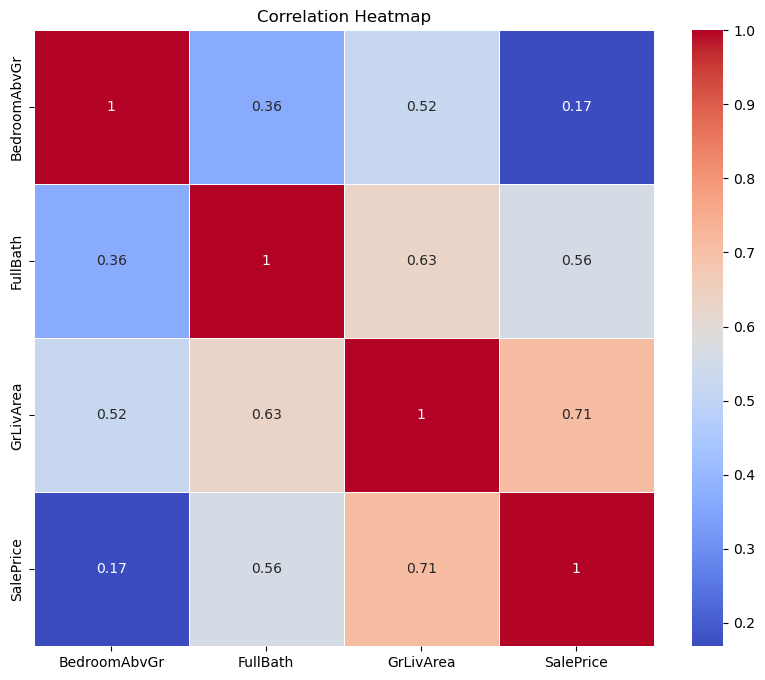

In [19]:
correlation_matrix = train_data[features + ['SalePrice']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()